# Solar Wind Overview

In this notebook I'd like to investigate the data from the ACE spacecraft as recorded in the OMNI low res data to verify relations presented in the literature on space weather. To begin with, I reproduce Figures 5-8 of C. T. Russell's chapter "Solar Wind and Interplanetary Magnetic Field: A Tutorial" in the AGU Space Weather monograph. These figures show the observational relationships between the solar wind speed, density, and temperature.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load OMNI low res

First let's load the OMNI low res data that we're using for the deep learning problem.

In [11]:
# load hdf file
omni_lr = pd.read_hdf('../OMNI_data/omni_hourly_1998-2017.h5')
# let's ignore the values from 2018 (just from January 1st)
omni_lr = omni_lr[omni_lr['Year'] != 2018]

# now split up data
yr = omni_lr['Year'].values
yr_unique = np.unique(yr)
nyr = len(yr_unique)
t = omni_lr['python time'].values
# predictors
X = omni_lr[['Bx, GSM (nT)', \
             'By, GSM (nT)', \
             'Bz, GSM (nT)', \
             'SW proton density (N/cm^3)', \
             'SW plasma speed (km/s)', \
             'SW proton temp (K)', \
             'alpha/proton ratio', \
             'sunspot number', \
             'f10.7 index', \
             'lyman alpha index', \
             'proton flux >1 Mev', \
             'proton flux >2 Mev', \
             'proton flux >4 Mev', \
             'proton flux >10 Mev', \
             'proton flux >30 Mev', \
             'proton flux >60 Mev']]
# concise feature names
feat = ['Bx', 'By', 'Bz', 'SW proton density', 'SW speed', 'SW temp', \
        'alpha/proton ratio', 'sunspot no.', 'f10.7 index', 'lyman alpha index', \
        'proton >1 Mev', 'proton >2 Mev', 'proton >4 Mev', 'proton >10 Mev', \
        'proton >30 Mev', 'proton >60 Mev']
nfeat = X.shape[1]
# targets (Dst for now)
Y = omni_lr['Dst index (nT)'].values

# nan values for each variable computed here
nanvals = np.max(X,axis=0)
# replace nanval for sunspots and lyman alpha index; no missing data there
nanvals[[7,9]] = 999

## Recreate Figures

Now let's reproduce Figures 5-8 from Russell's chapter. The first figure is a distribution of the solar wind speed:

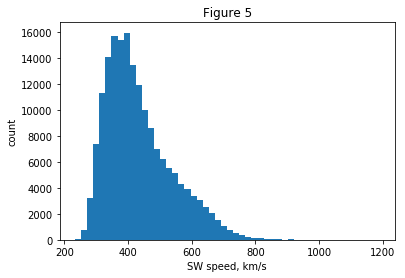

In [27]:
idx = X['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)']

plt.hist(X[idx]['SW plasma speed (km/s)'], bins=50)
plt.xlabel('SW speed, km/s')
plt.ylabel('count')
plt.title('Figure 5')
plt.show()

Figure 6 shows the logarithm of the solar wind density:

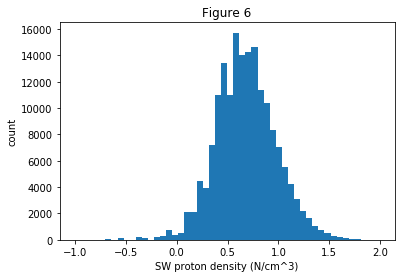

In [36]:
idx = X['SW proton density (N/cm^3)'] != nanvals['SW proton density (N/cm^3)']

plt.hist(np.log(X[idx]['SW proton density (N/cm^3)'])/np.log(10), bins=50)
plt.xlabel('SW proton density (N/cm^3)')
plt.ylabel('count')
plt.title('Figure 6')
plt.show()

Figure 7 is a bit more complicated and shows the variation of the solar wind density with solar wind velocity:

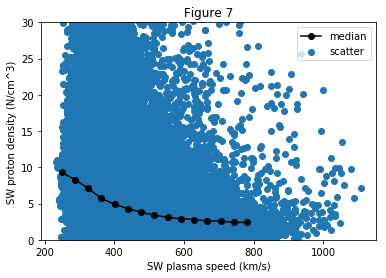

In [123]:
idx = (X['SW proton density (N/cm^3)'] != nanvals['SW proton density (N/cm^3)']) & (X['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)'])

# compute median values within bins of velocity
nbin = 15
bins = np.linspace(230,800,nbin+1)
bincen = bins[0:-1]+np.diff(bins)[0]/2
binidx = np.digitize(X[idx]['SW plasma speed (km/s)'].values, bins)
med = np.zeros(nbin)
for ii in range(nbin):
    med[ii] = np.median(X[idx]['SW proton density (N/cm^3)'][binidx == (ii+1)])

plt.scatter(X[idx]['SW plasma speed (km/s)'], X[idx]['SW proton density (N/cm^3)'], label='scatter')
ln1, = plt.plot(bincen, med, 'ko-', label='median')
plt.xlabel('SW plasma speed (km/s)')
plt.ylabel('SW proton density (N/cm^3)')
plt.title('Figure 7')
plt.legend()
plt.ylim([0, 30])
plt.show()

Finally, Figure 8 shows the solar wind proton temperature compared to the velocity:

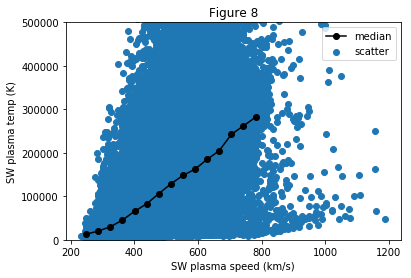

In [124]:
idx = (X['SW plasma temp (K)'] != nanvals['SW plasma temp (K)']) & (X['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)'])

# compute median values within bins of velocity
nbin = 15
bins = np.linspace(230,800,nbin+1)
bincen = bins[0:-1]+np.diff(bins)[0]/2
binidx = np.digitize(X[idx]['SW plasma speed (km/s)'].values, bins)
med = np.zeros(nbin)
for ii in range(nbin):
    med[ii] = np.median(X[idx]['SW plasma temp (K)'][binidx == (ii+1)])

plt.scatter(X[idx]['SW plasma speed (km/s)'], X[idx]['SW plasma temp (K)'], label='scatter')
ln1, = plt.plot(bincen, med, 'ko-', label='median')
plt.xlabel('SW plasma speed (km/s)')
plt.ylabel('SW plasma temp (K)')
plt.title('Figure 8')
plt.legend()
plt.ylim([0, 5e5])
plt.show()

Comparing with the figures shown by Russell, we see that the OMNI low-res data capture essentially the same trends, demonstrating the reproducibility of the observational data.